## CS 335 - Machine Learning
### Prerequisite test

- Tirth Patel
- 21110225

## 1

$(n, k) \times (k, m) \rightarrow (n, m)$ matrix

Final matrix will have $n \times m$ elements. Each element of $(n, m)$ matrix is calculated by dot product of row of $(n, k)$ and col of $(k, m)$. Number of elements in row $(n, k)$ = Number of elements in col $(k, m)$ = $k$. Therefore, one element requires $k$ multiplications and $k - 1$ additions.
- Total no. of multiplications = $nkm$
- Total no. of additions = $nm(k - 1)$

## 2

The custom matrix multiplication function is marginally faster for small matrices multiplications than numpy array matrix multiplication.

But for large matrices, numpy array matrix multiplication is faster than custom matrix multiplication.

Numpy is faster because it is written in C and incorporates many CPU optimizations. Numpy also uses custom memory management techniques to avoid overhead of Python objects.

It is marginally slow for small matrices because of the overhead of calling C functions from Python. But for large matrices, the overhead is negligible.

In [289]:
import numpy as np
import time

A = [[1,2,3],
    [3,6,2],
    [4,3,6],
    [4,5,5]]

B = [[5,3],
    [4,4],
    [5,9]]

large_C = np.linspace(0, 100, 10000).reshape(100, 100)
large_D = np.linspace(0, 100, 10000).reshape(100, 100)

def matrix_multiplication(A, B):
    t_now = time.time()
    C = []
    for row in A:
        c_row = []
        for j in range(len(B[0])):
            a = 0
            for i in range(len(B)):
                a += row[i] * B[i][j]
            c_row.append(a)
        C.append(c_row)
    t_final = time.time()
    print("Execution time of custom matrix multiplication function: ", t_final - t_now)
    return C

def matrix_multiplication_np(A, B):
    t_now = time.time()
    C_np = np.dot(A, B)
    t_final = time.time()
    print("Execution time of numpy matrix multiplication: ", t_final - t_now)
    return C_np


C = matrix_multiplication(A, B)
C_np = matrix_multiplication_np(np.array(A), np.array(B))
print("A x B using custom function:", C)
print("A x B using numpy:", C_np)

large_C = matrix_multiplication(large_C, large_D)
large_C_np = matrix_multiplication_np(large_C, large_D)
print("Large matrix multiplication using custom function:", large_C)
print("Large matrix multiplication using numpy:", large_C_np)

Execution time of custom matrix multiplication function:  1.7642974853515625e-05
Execution time of numpy matrix multiplication:  1.0967254638671875e-05
A x B using custom function: [[28, 38], [49, 51], [62, 78], [65, 77]]
A x B using numpy: [[28 38]
 [49 51]
 [62 78]
 [65 77]]
Execution time of custom matrix multiplication function:  0.2464587688446045
Execution time of numpy matrix multiplication:  0.0008740425109863281
Large matrix multiplication using custom function: [[3284.1567985181355, 3284.6518975329877, 3285.146996547841, 3285.6420955626913, 3286.1371945775445, 3286.6322935923954, 3287.127392607248, 3287.6224916221004, 3288.117590636952, 3288.612689651803, 3289.107788666655, 3289.6028876815053, 3290.09798669636, 3290.593085711212, 3291.0881847260634, 3291.5832837409152, 3292.078382755768, 3292.57348177062, 3293.068580785472, 3293.5636798003234, 3294.0587788151756, 3294.553877830028, 3295.0489768448797, 3295.544075859732, 3296.0391748745833, 3296.5342738894365, 3297.02937290428

## 3

Finding median of a list:
- Brute force (multiple passes): $O(n^2)$
- Sorting and finding middle element: $O(n \log n)$

Time taken for:
- small lists: sort < brute force < numpy (marginal differences) 
- large lists: numpy < sort < brute force 


In [290]:
import numpy as np
import time

A = [2,5,3,24,6,34,7,75,33,34]
B = [2,5,3,24,6,34,7,75,33]

large_C = np.random.randint(0, 100, 10000)
large_C_list = large_C.tolist()

def find_median_brute(A):
    t_now = time.time()
    is_odd = len(A) % 2
    median_idx = int(len(A) / 2) + 1
    median = 0

    prev = 0
    for n in range(median_idx):
        maximum = A[0]
        max_idx = 0
        prevs = prev
        for i in range(len(A)):
            if A[i] > maximum:
                max_idx = i
                maximum = A[i]
        prev = maximum
        A.pop(max_idx)


    if is_odd == 1:
        median = maximum
    else:
        median = (maximum + prevs) / 2
    
    t_final = time.time()
    print("Execution time of brute median:", t_final - t_now)

    return median


def find_median_sort(A):
    t_now = time.time()
    A.sort()
    is_odd = len(A) % 2
    median_idx = int(len(A) / 2) + 1
    median = 0
    if is_odd == 1:
        median = A[median_idx - 1]
    else:
        median = (A[median_idx - 1] + A[median_idx - 2]) / 2
    t_final = time.time()
    print("Execution time of sort median:", t_final - t_now)
    return median


def find_median_numpy(A):
    t_now = time.time()
    median = np.median(A)
    t_final = time.time()
    print("Execution time of numpy median:", t_final - t_now)
    return median


np_a = find_median_numpy(np.array(A))
np_b = find_median_numpy(np.array(B))
np_large_C = find_median_numpy(large_C)
print("numpy [A, B, large_C]:", np_a, np_b, np_large_C)


sort_a = find_median_sort(A)
sort_b = find_median_sort(B)
sort_large_C = find_median_sort(large_C_list)
print("sort [A, B, large_C]:", sort_a, sort_b, sort_large_C)


brute_a = find_median_brute(A)
brute_b = find_median_brute(B)
brute_large_C = find_median_brute(large_C_list)
print("brute [A, B, large_C]:", brute_a, brute_b, brute_large_C)


Execution time of numpy median: 9.489059448242188e-05
Execution time of numpy median: 5.2928924560546875e-05
Execution time of numpy median: 0.00034236907958984375
numpy [A, B, large_C]: 15.5 7.0 48.0
Execution time of sort median: 5.245208740234375e-06
Execution time of sort median: 1.1920928955078125e-06
Execution time of sort median: 0.0012950897216796875
sort [A, B, large_C]: 15.5 7 48.0
Execution time of brute median: 1.33514404296875e-05
Execution time of brute median: 5.7220458984375e-06
Execution time of brute median: 0.7211544513702393
brute [A, B, large_C]: 15.5 7 48.0


## 4
 
$f(x,y) = x^2y + y^3 \sin(x)$

Gradient with respect to x:
$
    \frac{\delta f(x,y)}{\delta x} = 2xy + y^3 \cos(x)
$

Gradient with respect to y:
$
    \frac{\delta f(x,y)}{\delta y} = x^2 + 3y^2 \sin(x)
$

## 5

In [291]:
import jax
import random

def f(x,y):
    return x**2 * y + y**3 * jax.numpy.sin(x)

def f_x(x,y):
    return 2*x*y + y**3 * jax.numpy.cos(x)

def f_y(x,y):
    return x**2 + 3*y**2 * jax.numpy.sin(x)

grad_x = jax.grad(f, argnums=0)
grad_y = jax.grad(f, argnums=1)


for i in range(3):
    x = random.random()
    y = random.random()
    print("x:", x, "y:", y)
    print("\t[jax] gradient w.r.t x:", grad_x(x,y))
    print("\tgradient w.r.t x:", f_x(x,y))
    print("\t[jax] gradient w.r.t y:", grad_y(x,y))
    print("\tgradient w.r.t y:", f_y(x,y))
    print()


x: 0.47771091449802716 y: 0.18490509822097767
	[jax] gradient w.r.t x: 0.1822765
	gradient w.r.t x: 0.18227652
	[jax] gradient w.r.t y: 0.2753639
	gradient w.r.t y: 0.2753639

x: 0.8093878136236542 y: 0.012405964558830807
	[jax] gradient w.r.t x: 0.020083789
	gradient w.r.t x: 0.02008379
	[jax] gradient w.r.t y: 0.65544283
	gradient w.r.t y: 0.65544283

x: 0.4571062630005396 y: 0.3609496635135111
	[jax] gradient w.r.t x: 0.37218288
	gradient w.r.t x: 0.37218288
	[jax] gradient w.r.t y: 0.38145083
	gradient w.r.t y: 0.38145083



## 6

In [292]:
import sympy as sym
import random

x = sym.Symbol('x')
y = sym.Symbol('y')

def f(x,y):
    return x**2 * y + y**3 * sym.sin(x)

def f_x(x,y):
    return sym.diff(f(x,y), x)

def f_y(x,y):
    return sym.diff(f(x,y), y)


print("\t[sympy] gradient w.r.t x (expression):", f_x(x,y))
print("\t[sympy] gradient w.r.t y (expression):", f_y(x,y))
print()

	[sympy] gradient w.r.t x (expression): 2*x*y + y**3*cos(x)
	[sympy] gradient w.r.t y (expression): x**2 + 3*y**2*sin(x)



## 7

In [293]:
marks_dict = {
    "2022": {
        "Branch 1": [
            {
                "Roll Number": 1,
                "Name": "E",
                "Marks": {
                    "Maths": 99,
                    "Physics": 91,
                    "Chemistry": 49
            }},
            {
                "Roll Number": 2,
                "Name": "F",
                "Marks": {
                    "Maths": 69,
                    "Physics": 54,
                    "Chemistry": 100
            }},
        ],
        "Branch 2": []
    },
    "2023": {
        "Branch 1": [],
        "Branch 2": []
    },
    "2024": {
        "Branch 1": [],
        "Branch 2": []
    },
    "2025": {
        "Branch 1": [],
        "Branch 2": []
    }
}

marks_dict

{'2022': {'Branch 1': [{'Roll Number': 1,
    'Name': 'E',
    'Marks': {'Maths': 99, 'Physics': 91, 'Chemistry': 49}},
   {'Roll Number': 2,
    'Name': 'F',
    'Marks': {'Maths': 69, 'Physics': 54, 'Chemistry': 100}}],
  'Branch 2': []},
 '2023': {'Branch 1': [], 'Branch 2': []},
 '2024': {'Branch 1': [], 'Branch 2': []},
 '2025': {'Branch 1': [], 'Branch 2': []}}

## 8

In [294]:
class Student:
    def __init__(self, roll_number, name, marks):
        self.roll_number = roll_number
        self.name = name
        self.marks = marks

class Branch:
    def __init__(self, name):
        self.name = name
        self.students = []

class Year:
    def __init__(self, year):
        self.year = year
        self.branches = []

class Database:
    def __init__(self):
        self.years = []

    def add_year(self, year):
        self.years.append(Year(year))

    def add_branch(self, year, branch):
        for y in self.years:
            if y.year == year:
                y.branches.append(Branch(branch))

    def add_student(self, year, branch, student):
        for y in self.years:
            if y.year == year:
                for b in y.branches:
                    if b.name == branch:
                        b.students.append(student)

    def print(self):
        for y in self.years:
            print("Year:", y.year)
            for b in y.branches:
                print("\tBranch:", b.name)
                for s in b.students:
                    print("\t\tStudent:", s.name, "- Roll Number:", s.roll_number, "- Marks:", s.marks)


# I have added methods only to database class for convinience of finding index using for loops in Database class

db = Database()
db.add_year("2022")
db.add_branch("2022", "Branch 1")
db.add_student("2022", "Branch 1", Student(1, "M", {"Maths": 99, "Physics": 91, "Chemistry": 49}))
db.add_student("2022", "Branch 1", Student(2, "N", {"Maths": 69, "Physics": 54, "Chemistry": 100}))
db.add_branch("2022", "Branch 2")
db.add_year("2023")
db.add_branch("2023", "Branch 1")
db.add_branch("2023", "Branch 2")
db.print()



Year: 2022
	Branch: Branch 1
		Student: M - Roll Number: 1 - Marks: {'Maths': 99, 'Physics': 91, 'Chemistry': 49}
		Student: N - Roll Number: 2 - Marks: {'Maths': 69, 'Physics': 54, 'Chemistry': 100}
	Branch: Branch 2
Year: 2023
	Branch: Branch 1
	Branch: Branch 2


## 9

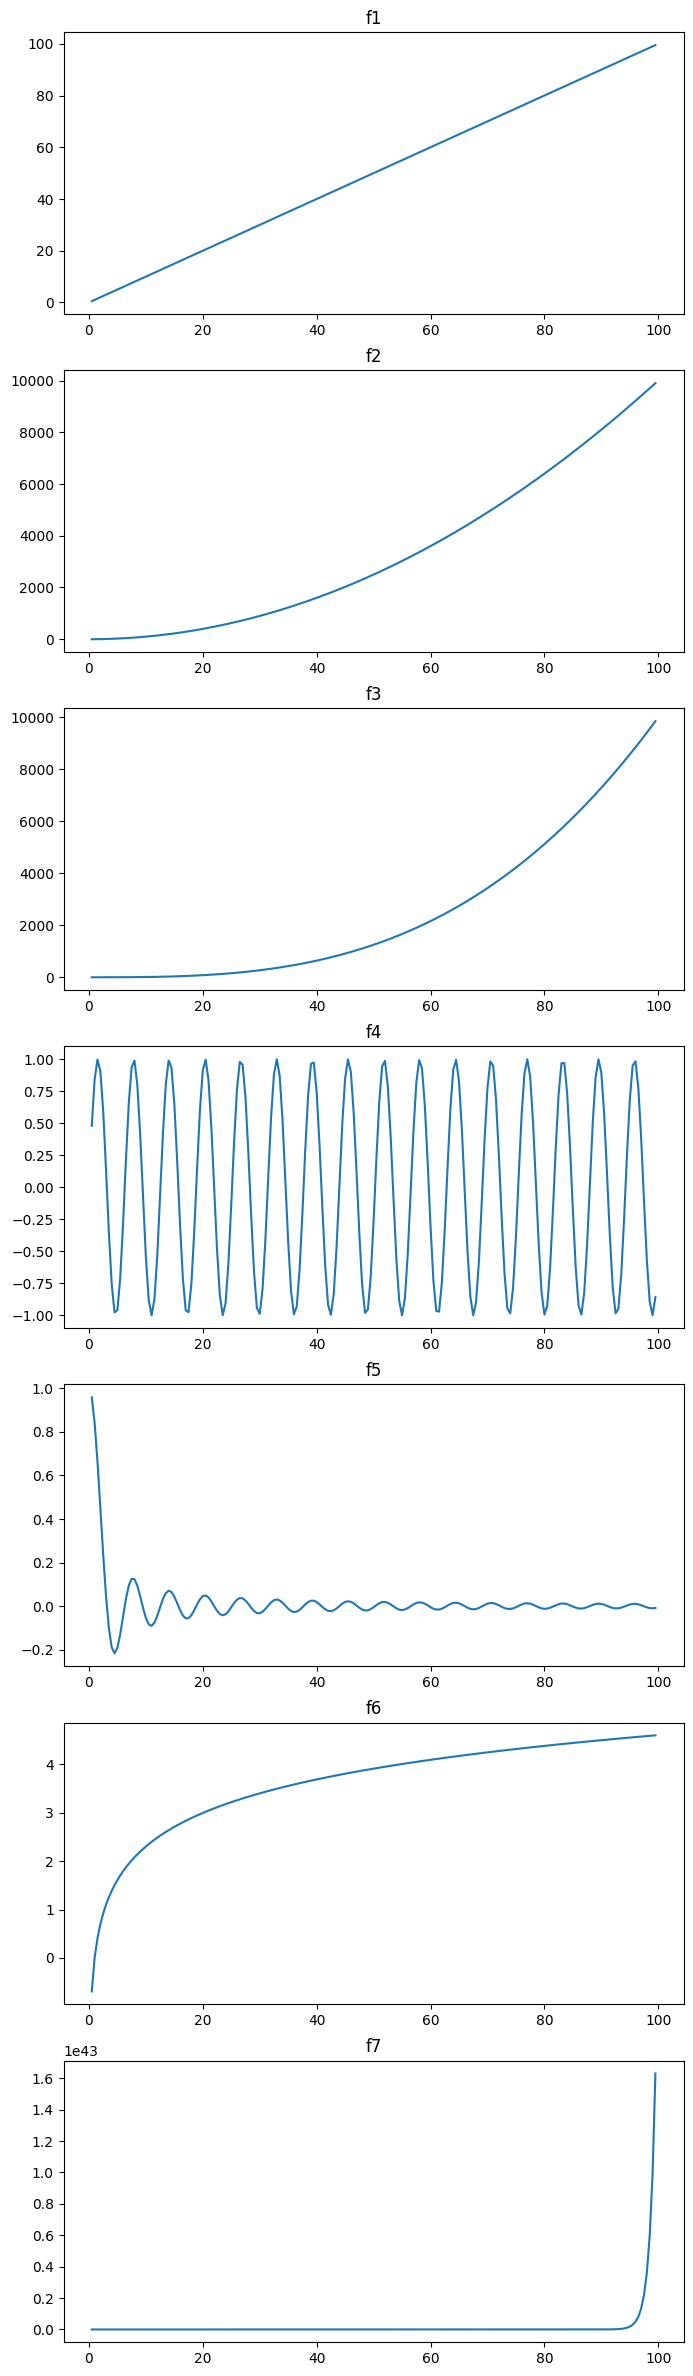

In [295]:
import matplotlib.pyplot as plt
import numpy as np
import math

def f1(x):
    return x

def f2(x):
    return x**2

def f3(x):
    return x**3/100

def f4(x):
    return np.sin(x)

def f5(x):
    return np.sin(x) / x

def f6(x):
    return np.log(x)

def f7(x):
    return np.exp(x)


x = np.arange(0.5, 100.0, 0.5)

fig, axs = plt.subplots(7, 1, figsize=(8, 30))

axs[0].plot(x, f1(x), label="f1")
axs[0].set_title("f1")

axs[1].plot(x, f2(x), label="f2")
axs[1].set_title("f2")

axs[2].plot(x, f3(x), label="f3")
axs[2].set_title("f3")

axs[3].plot(x, f4(x), label="f4")
axs[3].set_title("f4")

axs[4].plot(x, f5(x), label="f5")
axs[4].set_title("f5")

axs[5].plot(x, f6(x), label="f6")
axs[5].set_title("f6")

axs[6].plot(x, f7(x), label="f7")
axs[6].set_title("f7")

plt.show()


## 10

In [296]:
import numpy as np
import pandas as pd

A = np.random.uniform(1, 2, (20, 5))
# print(A)

df = pd.DataFrame(A, columns=["a", "b", "c", "d", "e"])
# print(df)

print("Column with highest stdev:", df.std().idxmax())
print("Row with lowest mean:", df.mean(axis=1).idxmin())

Column with highest stdev: c
Row with lowest mean: 13


## 11

In [297]:
# df["f"] = df.sum(axis=1) # this adds value of f to itself after re-running the cell
df["f"] = df["a"] + df["b"] + df["c"] + df["d"] + df["e"]
# print(df)

df["g"] = ["LT8" if x < 8 else "GT8" for x in df["f"]]
# print(df)

df["g"].eq("LT8").sum() # number of rows where g == "LT8"

17

## 12

Numpy broadcasting is used for operations between arrays of different shapes. It is used to avoid unnecessary copying of data and thus saves memory.

Smaller array is broadcasted to match the shape of larger array. The smaller array is repeated along the missing dimensions.

[Reference](https://numpy.org/doc/stable/user/basics.broadcasting.html)

In [298]:
import numpy as np

a = np.array([1,2,3,4,5])
b = 2.0

print("a + b:", a + b)
print("a * b:", a * b)

# Here b is broadcasted to [2.0, 2.0, 2.0, 2.0, 2.0] and then operated against a without actually creating the expanded b array


a + b: [3. 4. 5. 6. 7.]
a * b: [ 2.  4.  6.  8. 10.]


## 13

In [299]:
import numpy as np

A = np.array([[10,2,3],
            [4,5,6],
            [7,-8,9]])

np.argmin(A) # [0,0,0]

a3D = np.array([[[1, 2], [3, 4]], [[5, 6], [7, 8]]])
a4D = np.array([[[[10, 2], [3, 4]], [[5, -6], [7, 8]]]])

# a4D.argmin() 
# using above as reference for input/ouptut of argmin, I wrote the following custom_argmin function.
# This funciton first flattens the array, then finds the minimum value and returns the index of that value.

def custom_argmin(A):
    flat_A = A.flatten()
    min = flat_A[0]
    min_idx = 0
    for i in range(len(flat_A)):
        if flat_A[i] < min:
            min = flat_A[i]
            min_idx = i
    return min_idx

print("\nA:", A, "\n\tcustom_argmin of A:", custom_argmin(A), "\n\tnumpy argmin of A:", A.argmin())
print("\na3D:", a3D, "\n\tcustom_argmin of a3D:", custom_argmin(a3D), "\n\tnumpy argmin of a3D:", a3D.argmin())
print("\na4D:", a4D, "\n\tcustom_argmin of a4D:", custom_argmin(a4D), "\n\tnumpy argmin of a4D:", a4D.argmin())



A: [[10  2  3]
 [ 4  5  6]
 [ 7 -8  9]] 
	custom_argmin of A: 7 
	numpy argmin of A: 7

a3D: [[[1 2]
  [3 4]]

 [[5 6]
  [7 8]]] 
	custom_argmin of a3D: 0 
	numpy argmin of a3D: 0

a4D: [[[[10  2]
   [ 3  4]]

  [[ 5 -6]
   [ 7  8]]]] 
	custom_argmin of a4D: 5 
	numpy argmin of a4D: 5
